## 1) Cleaning data

1. Filtering out noise
2. Making data available for analysis


## 2) What is statistics?

Simple statistics

## 3) Practical examples of data mining

## 4) Dataset examples

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df=pd.read_csv('single_family_home_values.csv')  # comes from zillow

In [4]:
df.head(10)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaN,NaN,488840
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676
5,3523925,6535 W Sumac Ave,Denver,CO,80123,39.615136,-105.069018,3,5.0,7,2051,6045,1996.0,2006-09-12,363500,2005-05-16,339000.0,496062
6,30560679,6673 W Berry Ave,Denver,CO,80123,39.616350,-105.070760,4,4.0,8,2051,6315,1997.0,2014-12-15,420000,2006-07-07,345000.0,514953
7,39623928,5640 S Otis St,Denver,CO,80123,39.615213,-105.070617,3,3.0,7,2051,8133,1997.0,2004-03-15,328700,1998-04-09,225200.0,494321
8,148975825,5342 S Gray St,Denver,CO,80123,39.620158,-105.063094,3,3.0,7,1796,5038,1999.0,2011-08-16,274900,2011-01-10,0.0,496079
9,184623176,4967 S Wadsworth Blvd,Denver,CO,80123,39.626770,-105.081990,3,3.0,0,2054,4050,2007.0,2015-12-01,407000,2012-10-30,312000.0,424514


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.shape  # provides rows, columns

(15000, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         14985 non-null  float64
 6   longitude        14985 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        14999 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    11173 non-null  object 
 16  priorSaleAmount  11287 non-null  float64
 17  estimated_va

In [8]:
df.describe()

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
count,1.500000e+04,15000.000000,14985.000000,14985.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,14999.000000,1.500000e+04,1.128700e+04,1.500000e+04
mean,5.176229e+07,80204.919467,39.740538,-104.964076,2.708400,2.195067,6.164133,1514.504400,5820.76620,1929.517168,4.053563e+05,2.594350e+05,6.371625e+05
std,6.190876e+07,9.715263,0.023555,0.039788,0.897231,1.166279,1.958601,830.635999,3013.27947,29.937051,7.756998e+05,3.379387e+05,5.044185e+05
min,1.433670e+05,80022.000000,39.614531,-105.108440,0.000000,0.000000,0.000000,350.000000,278.00000,1874.000000,2.590000e+02,0.000000e+00,1.477670e+05
25%,1.004802e+07,80205.000000,39.727634,-104.978737,2.000000,1.000000,5.000000,986.000000,4620.00000,1907.000000,1.940000e+05,1.100000e+05,3.984348e+05
50%,2.563241e+07,80206.000000,39.748048,-104.957689,3.000000,2.000000,6.000000,1267.500000,5950.00000,1925.000000,3.200000e+05,2.100000e+05,5.183575e+05
75%,5.114222e+07,80207.000000,39.758214,-104.937522,3.000000,3.000000,7.000000,1766.250000,6270.00000,1949.000000,4.632000e+05,3.302400e+05,6.879692e+05
max,3.209481e+08,80209.000000,39.888020,-104.830930,15.000000,12.000000,39.000000,10907.000000,122839.00000,2016.000000,4.560000e+07,1.600000e+07,1.014531e+07


In [9]:
df2= df.fillna(0)

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         15000 non-null  float64
 6   longitude        15000 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        15000 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    15000 non-null  object 
 16  priorSaleAmount  15000 non-null  float64
 17  estimated_va

In [11]:
df3 = df.fillna(df.mean())

/tmp/ipykernel_1139689/3465261257.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3 = df.fillna(df.mean())


In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         15000 non-null  float64
 6   longitude        15000 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        15000 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    11173 non-null  object 
 16  priorSaleAmount  15000 non-null  float64
 17  estimated_va

In [13]:
df.dropna(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11078 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               11078 non-null  int64  
 1   address          11078 non-null  object 
 2   city             11078 non-null  object 
 3   state            11078 non-null  object 
 4   zipcode          11078 non-null  int64  
 5   latitude         11078 non-null  float64
 6   longitude        11078 non-null  float64
 7   bedrooms         11078 non-null  int64  
 8   bathrooms        11078 non-null  float64
 9   rooms            11078 non-null  int64  
 10  squareFootage    11078 non-null  int64  
 11  lotSize          11078 non-null  int64  
 12  yearBuilt        11078 non-null  float64
 13  lastSaleDate     11078 non-null  object 
 14  lastSaleAmount   11078 non-null  int64  
 15  priorSaleDate    11078 non-null  object 
 16  priorSaleAmount  11078 non-null  float64
 17  estimated_va

In [15]:
df.estimated_value

0         239753
3         494073
4         513676
5         496062
6         514953
          ...   
14994     784955
14996     807306
14997    1737156
14998    2008794
14999    1421401
Name: estimated_value, Length: 11078, dtype: int64

In [19]:
df['estimated_value']   #this is another way to call the above df.estimated_value

0         239753
3         494073
4         513676
5         496062
6         514953
          ...   
14994     784955
14996     807306
14997    1737156
14998    2008794
14999    1421401
Name: estimated_value, Length: 11078, dtype: int64

/home/orestpena/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='estimated_value'>

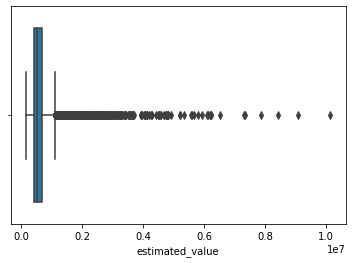

In [20]:
sns.boxplot(df.estimated_value)

In [22]:
df[['estimated_value', 'yearBuilt', 'priorSaleAmount']]  #to see more than 1 column. You are actually sending a list of column headers.

,estimated_value,yearBuilt,priorSaleAmount
0,239753,2003.0,165700.0
3,494073,1956.0,0.0
4,513676,1998.0,0.0
5,496062,1996.0,339000.0
6,514953,1997.0,345000.0
...,...,...,...
14994,784955,1925.0,142000.0
14996,807306,1890.0,557500.0
14997,1737156,2007.0,1208214.0
14998,2008794,2005.0,405000.0


In [25]:
df[df.estimated_value<=800000].shape  #we got rid of the rows under $800000, getting rid of the outliers

(9456, 18)

In [26]:
df.shape

(11078, 18)

In [28]:
df.estimated_value<=800000

0         True
3         True
4         True
5         True
6         True
         ...  
14994     True
14996    False
14997    False
14998    False
14999    False
Name: estimated_value, Length: 11078, dtype: bool

In [29]:
df[df.estimated_value<=800000]

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676
5,3523925,6535 W Sumac Ave,Denver,CO,80123,39.615136,-105.069018,3,5.0,7,2051,6045,1996.0,2006-09-12,363500,2005-05-16,339000.0,496062
6,30560679,6673 W Berry Ave,Denver,CO,80123,39.616350,-105.070760,4,4.0,8,2051,6315,1997.0,2014-12-15,420000,2006-07-07,345000.0,514953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14982,43208991,731 S Elizabeth St,Denver,CO,80209,39.703135,-104.956141,2,3.0,6,2680,6160,2016.0,2015-03-31,485000,2003-06-19,357500.0,753935
14989,23766957,421 S Washington St,Denver,CO,80209,39.708869,-104.979540,2,2.0,6,1145,4690,1924.0,2008-07-08,385000,1998-01-30,182900.0,629031
14990,4511745,255 S Downing St,Denver,CO,80209,39.711870,-104.973735,2,2.0,5,1401,4690,1910.0,2009-10-06,385000,2005-08-03,360000.0,638952
14993,42985979,1016 S Emerson St,Denver,CO,80209,39.698090,-104.976608,3,2.0,6,1913,4760,1909.0,2017-05-31,600000,2013-06-07,535000.0,694981


In [30]:
df=df[df.estimated_value<=1000000] #gets rid of outliers of previous graph by increasing the vluue

/home/orestpena/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='estimated_value'>

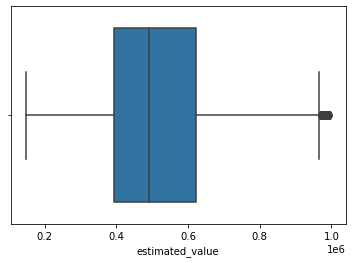

In [32]:
sns.boxplot(df.estimated_value)

<AxesSubplot:>

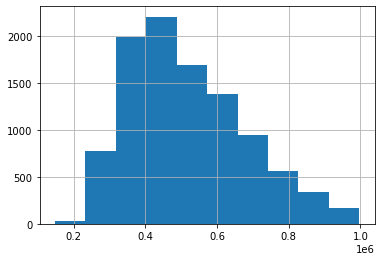

In [33]:
df.estimated_value.hist()

In [34]:
df.zipcode

0        80022
3        80033
4        80123
5        80123
6        80123
         ...  
14989    80209
14990    80209
14993    80209
14994    80209
14996    80209
Name: zipcode, Length: 10080, dtype: int64

In [35]:
df.zipcode.unique()

array([80022, 80033, 80123, 80203, 80204, 80205, 80206, 80207, 80209])

In [38]:
#filter out noise, slice df, and the outliers
df[(df.estimated_value<=1000000) & (df.yearBuilt>2013) & (df.zipcode==80209)]

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
13276,39512040,764 S York St,Denver,CO,80209,39.702607,-104.960243,3,4.0,7,2567,6250,2016.0,2012-07-23,420000,2010-11-29,385000.0,770622
13316,11586398,450 S Vine St,Denver,CO,80209,39.708351,-104.962546,3,5.0,7,2570,4680,2016.0,2015-02-11,571000,2007-01-03,399000.0,682810
13428,11586742,636 S Williams St,Denver,CO,80209,39.704969,-104.966025,3,5.0,6,2578,4680,2016.0,2015-07-22,637600,2007-02-02,481900.0,745777
13431,184305844,456 S High St,Denver,CO,80209,39.708197,-104.964857,3,5.0,10,3346,6240,2016.0,2016-01-11,725000,1993-07-15,124000.0,751361
13766,7652681,408 S Franklin St,Denver,CO,80209,39.709074,-104.968369,3,5.0,8,3367,5060,2015.0,2014-04-21,513486,2007-08-22,435000.0,709102
13812,39708952,611 S Washington St,Denver,CO,80209,39.705403,-104.979580,3,4.0,10,2090,4690,2014.0,2015-03-09,825000,2013-07-19,325500.0,994114
14162,30566405,876 S Williams St,Denver,CO,80209,39.700646,-104.966016,3,1.0,8,3394,6250,2015.0,2014-03-18,675000,2006-05-11,511000.0,869769
14982,43208991,731 S Elizabeth St,Denver,CO,80209,39.703135,-104.956141,2,3.0,6,2680,6160,2016.0,2015-03-31,485000,2003-06-19,357500.0,753935


# statistics

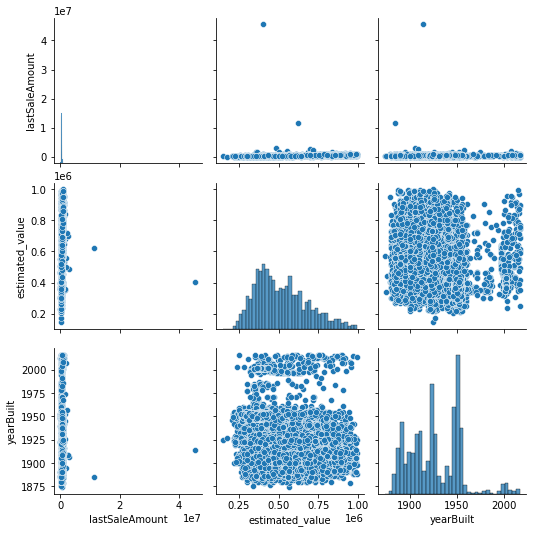

In [39]:
sns.pairplot(df[['lastSaleAmount', 'estimated_value', 'yearBuilt']])

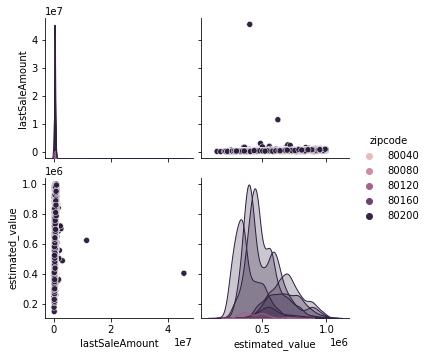

In [40]:
sns.pairplot(df[['lastSaleAmount', 'estimated_value', 'zipcode']], hue='zipcode')

<AxesSubplot:xlabel='zipcode', ylabel='estimated_value'>

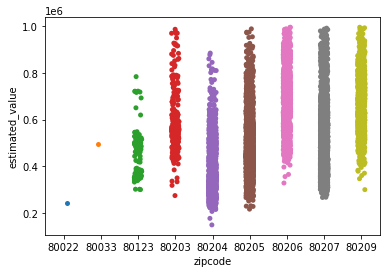

In [41]:
sns.stripplot(x=df.zipcode, y=df.estimated_value)

<AxesSubplot:xlabel='zipcode', ylabel='estimated_value'>

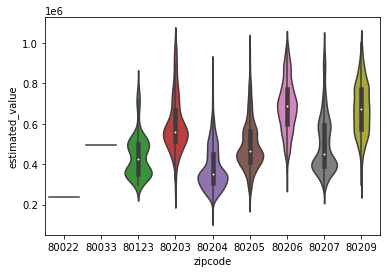

In [42]:
sns.violinplot(x=df.zipcode, y=df.estimated_value)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10080 entries, 0 to 14996
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10080 non-null  int64  
 1   address          10080 non-null  object 
 2   city             10080 non-null  object 
 3   state            10080 non-null  object 
 4   zipcode          10080 non-null  int64  
 5   latitude         10080 non-null  float64
 6   longitude        10080 non-null  float64
 7   bedrooms         10080 non-null  int64  
 8   bathrooms        10080 non-null  float64
 9   rooms            10080 non-null  int64  
 10  squareFootage    10080 non-null  int64  
 11  lotSize          10080 non-null  int64  
 12  yearBuilt        10080 non-null  float64
 13  lastSaleDate     10080 non-null  object 
 14  lastSaleAmount   10080 non-null  int64  
 15  priorSaleDate    10080 non-null  object 
 16  priorSaleAmount  10080 non-null  float64
 17  estimated_va

In [48]:
pd.to_datetime(df.priorSaleDate)

0       2004-05-13
3       2008-06-27
4       2011-12-29
5       2005-05-16
6       2006-07-07
           ...    
14989   1998-01-30
14990   2005-08-03
14993   2013-06-07
14994   1994-05-06
14996   2012-07-23
Name: priorSaleDate, Length: 10080, dtype: datetime64[ns]

In [49]:
df['priorSaleDate'] = pd.to_datetime(df.priorSaleDate)

In [50]:
df['new_col']=1  #this will add a new column

In [51]:
df.head(2)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,new_col
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.84916,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753,1
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.76078,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073,1


In [45]:
df['lastSaleDate']=pd.to_datetime(df.lastSaleDate)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10080 entries, 0 to 14996
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               10080 non-null  int64         
 1   address          10080 non-null  object        
 2   city             10080 non-null  object        
 3   state            10080 non-null  object        
 4   zipcode          10080 non-null  int64         
 5   latitude         10080 non-null  float64       
 6   longitude        10080 non-null  float64       
 7   bedrooms         10080 non-null  int64         
 8   bathrooms        10080 non-null  float64       
 9   rooms            10080 non-null  int64         
 10  squareFootage    10080 non-null  int64         
 11  lotSize          10080 non-null  int64         
 12  yearBuilt        10080 non-null  float64       
 13  lastSaleDate     10080 non-null  datetime64[ns]
 14  lastSaleAmount   10080 non-null  int64

In [53]:
df.lastSaleDate.dt.year   #dt becomes an innate function.

0        2009
3        2008
4        2012
5        2006
6        2014
         ... 
14989    2008
14990    2009
14993    2017
14994    2015
14996    2015
Name: lastSaleDate, Length: 10080, dtype: int64

In [55]:
df.lastSaleDate.dt.month  #gives month

0        12
3        12
4         7
5         9
6        12
         ..
14989     7
14990    10
14993     5
14994     9
14996     3
Name: lastSaleDate, Length: 10080, dtype: int64

In [56]:
df.lastSaleDate.dt.day #gives you day

0        17
3         2
4        18
5        12
6        15
         ..
14989     8
14990     6
14993    31
14994    10
14996     5
Name: lastSaleDate, Length: 10080, dtype: int64

In [57]:
df.lastSaleDate.dt.weekday  #0-Sunday, 1-Monday, 2-Tuesday, ...

0        3
3        1
4        2
5        1
6        0
        ..
14989    1
14990    1
14993    2
14994    3
14996    3
Name: lastSaleDate, Length: 10080, dtype: int64

In [58]:
df['weekday_lastSaleDate'] = df.lastSaleDate.dt.weekday

In [59]:
df.head(2)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,new_col,weekday_lastSaleDate
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.84916,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753,1,3
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.76078,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073,1,1


In [60]:
df['weekday_lastSaleDate'] = df.lastSaleDate.dt.weekday
df['year_lastSaleDate'] = df.lastSaleDate.dt.year

In [61]:
df['weekday_priorSaleDate'] = df.priorSaleDate.dt.weekday
df['year_priorSaleDate'] = df.priorSaleDate.dt.year

In [62]:
df.head(2)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,...,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,new_col,weekday_lastSaleDate,year_lastSaleDate,weekday_priorSaleDate,year_priorSaleDate
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.84916,-104.893468,3,2.0,6,...,2009-12-17,75000,2004-05-13,165700.0,239753,1,3,2009,3,2004
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.76078,-105.081060,4,3.0,0,...,2008-12-02,185000,2008-06-27,0.0,494073,1,1,2008,4,2008


In [64]:
df['year_between_last_sales'] = df.year_lastSaleDate-df.year_priorSaleDate

In [65]:
df.head(2)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,...,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,new_col,weekday_lastSaleDate,year_lastSaleDate,weekday_priorSaleDate,year_priorSaleDate,year_between_last_sales
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.84916,-104.893468,3,2.0,6,...,75000,2004-05-13,165700.0,239753,1,3,2009,3,2004,5
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.76078,-105.081060,4,3.0,0,...,185000,2008-06-27,0.0,494073,1,1,2008,4,2008,0


In [66]:
df.corr()

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value,new_col,weekday_lastSaleDate,year_lastSaleDate,weekday_priorSaleDate,year_priorSaleDate,year_between_last_sales
id,1.000000,-0.010738,-0.048857,0.048612,0.040073,0.109553,0.055079,0.098630,-0.018843,-0.005683,0.080936,0.014443,0.155242,NaN,-0.002359,0.218011,0.019297,-0.041562,0.198056
zipcode,-0.010738,1.000000,0.525664,0.391521,-0.046612,-0.079709,-0.003444,-0.087133,-0.074882,-0.225928,0.021791,0.010719,0.109972,NaN,-0.003557,0.028944,-0.020284,0.032686,-0.011973
latitude,-0.048857,0.525664,1.000000,0.548275,-0.017591,-0.098119,-0.125624,-0.138312,0.027107,-0.009182,-0.070974,-0.206421,-0.199005,NaN,-0.011990,0.047873,-0.023193,0.119592,-0.085440
longitude,0.048612,0.391521,0.548275,1.000000,-0.000365,0.098343,-0.011106,0.027918,0.106820,0.070313,0.049801,0.153947,0.234867,NaN,-0.006745,0.039253,-0.016098,0.042612,-0.014518
bedrooms,0.040073,-0.046612,-0.017591,-0.000365,1.000000,0.416741,0.676622,0.651856,-0.015604,-0.130463,0.068821,0.137372,0.358154,NaN,0.005290,-0.012779,-0.025703,-0.020316,0.011180
bathrooms,0.109553,-0.079709,-0.098119,0.098343,0.416741,1.000000,0.550545,0.665222,-0.013431,-0.013842,0.164183,0.342366,0.652591,NaN,-0.003387,0.070314,-0.026047,0.057723,-0.007367
rooms,0.055079,-0.003444,-0.125624,-0.011106,0.676622,0.550545,1.000000,0.732308,-0.117461,-0.251573,0.138688,0.281002,0.581398,NaN,0.020109,-0.035527,-0.029045,-0.078523,0.053161
squareFootage,0.098630,-0.087133,-0.138312,0.027918,0.651856,0.665222,0.732308,1.000000,-0.045825,-0.189324,0.165884,0.332731,0.690945,NaN,0.002161,-0.004980,-0.017310,-0.077565,0.074120
lotSize,-0.018843,-0.074882,0.027107,0.106820,-0.015604,-0.013431,-0.117461,-0.045825,1.000000,0.459040,-0.026325,-0.047049,-0.072603,NaN,0.007123,-0.006893,0.003134,0.031988,-0.036986
yearBuilt,-0.005683,-0.225928,-0.009182,0.070313,-0.130463,-0.013842,-0.251573,-0.189324,0.459040,1.000000,-0.063830,-0.113654,-0.255941,NaN,-0.004999,0.028454,0.011164,0.064898,-0.044590


In [67]:
type(df.corr())

pandas.core.frame.DataFrame

In [68]:
df.corr().loc['estimated_value' , : ]

id                         0.155242
zipcode                    0.109972
latitude                  -0.199005
longitude                  0.234867
bedrooms                   0.358154
bathrooms                  0.652591
rooms                      0.581398
squareFootage              0.690945
lotSize                   -0.072603
yearBuilt                 -0.255941
lastSaleAmount             0.258833
priorSaleAmount            0.566327
estimated_value            1.000000
new_col                         NaN
weekday_lastSaleDate       0.000469
year_lastSaleDate          0.042969
weekday_priorSaleDate     -0.013685
year_priorSaleDate        -0.058554
year_between_last_sales    0.089481
Name: estimated_value, dtype: float64

In [69]:
df.corr().loc['estimated_value' , : ].sort_values()

yearBuilt                 -0.255941
latitude                  -0.199005
lotSize                   -0.072603
year_priorSaleDate        -0.058554
weekday_priorSaleDate     -0.013685
weekday_lastSaleDate       0.000469
year_lastSaleDate          0.042969
year_between_last_sales    0.089481
zipcode                    0.109972
id                         0.155242
longitude                  0.234867
lastSaleAmount             0.258833
bedrooms                   0.358154
priorSaleAmount            0.566327
rooms                      0.581398
bathrooms                  0.652591
squareFootage              0.690945
estimated_value            1.000000
new_col                         NaN
Name: estimated_value, dtype: float64

In [70]:
df.corr().loc['estimated_value' , : ].sort_values(ascending=False)

estimated_value            1.000000
squareFootage              0.690945
bathrooms                  0.652591
rooms                      0.581398
priorSaleAmount            0.566327
bedrooms                   0.358154
lastSaleAmount             0.258833
longitude                  0.234867
id                         0.155242
zipcode                    0.109972
year_between_last_sales    0.089481
year_lastSaleDate          0.042969
weekday_lastSaleDate       0.000469
weekday_priorSaleDate     -0.013685
year_priorSaleDate        -0.058554
lotSize                   -0.072603
latitude                  -0.199005
yearBuilt                 -0.255941
new_col                         NaN
Name: estimated_value, dtype: float64

## 3) Practical examples of data mining

In [71]:
#Group by
df.groupby('zipcode').estimated_value.mean()

zipcode
80022    239753.000000
80033    494073.000000
80123    442041.557377
80203    597057.185039
80204    382170.764015
80205    493931.957111
80206    687471.786271
80207    502097.067866
80209    675948.477064
Name: estimated_value, dtype: float64

In [72]:
#Group by
df.groupby('zipcode').estimated_value.min()

zipcode
80022    239753
80033    494073
80123    299492
80203    273748
80204    147767
80205    215531
80206    327685
80207    265666
80209    299293
Name: estimated_value, dtype: int64

In [74]:
#Group by
df.groupby(['zipcode', 'yearBuilt']).estimated_value.min()

zipcode  yearBuilt
80022    2003.0       239753
80033    1956.0       494073
80123    1959.0       350568
         1960.0       366187
         1961.0       348035
                       ...  
80209    2008.0       683866
         2010.0       686395
         2014.0       994114
         2015.0       709102
         2016.0       682810
Name: estimated_value, Length: 551, dtype: int64

In [75]:
#Group by
df.groupby(['zipcode', 'yearBuilt']).estimated_value.median()

zipcode  yearBuilt
80022    2003.0       239753.0
80033    1956.0       494073.0
80123    1959.0       378509.0
         1960.0       370857.0
         1961.0       348035.0
                        ...   
80209    2008.0       749428.5
         2010.0       686395.0
         2014.0       994114.0
         2015.0       789435.5
         2016.0       751361.0
Name: estimated_value, Length: 551, dtype: float64

In [77]:
#Group by
type(df.groupby('zipcode').estimated_value.median()) #this is a series next row will show you how to reset

pandas.core.series.Series

In [78]:
#Group by
df.groupby(['zipcode', 'yearBuilt']).estimated_value.median().reset_index() #this will reset to dataframe

,zipcode,yearBuilt,estimated_value
0,80022,2003.0,239753.0
1,80033,1956.0,494073.0
2,80123,1959.0,378509.0
3,80123,1960.0,370857.0
4,80123,1961.0,348035.0
...,...,...,...
546,80209,2008.0,749428.5
547,80209,2010.0,686395.0
548,80209,2014.0,994114.0
549,80209,2015.0,789435.5


In [80]:
#Group by
type(df.groupby(['zipcode', 'yearBuilt']).estimated_value.median().reset_index()) #this will reset to dataframe

pandas.core.frame.DataFrame

In [85]:
df2 = df.groupby('zipcode').estimated_value.mean().reset_index()

In [86]:
df2.columns=['zipcode', 'median_value']

In [ ]:
#merge df   # merge means combining the 2 tables or 2 dataframes, based on a comon column

In [ ]:
#pd.merge(df, df2, on='zipcode')

In [92]:
df2

,zipcode,median_value
0,80022,239753.000000
1,80033,494073.000000
2,80123,442041.557377
3,80203,597057.185039
4,80204,382170.764015
5,80205,493931.957111
6,80206,687471.786271
7,80207,502097.067866
8,80209,675948.477064


In [89]:
df.head(2)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,...,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,new_col,weekday_lastSaleDate,year_lastSaleDate,weekday_priorSaleDate,year_priorSaleDate,year_between_last_sales
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.84916,-104.893468,3,2.0,6,...,75000,2004-05-13,165700.0,239753,1,3,2009,3,2004,5
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.76078,-105.081060,4,3.0,0,...,185000,2008-06-27,0.0,494073,1,1,2008,4,2008,0


In [90]:
df3 = pd.merge(df, df2, on='zipcode', how='left')

In [91]:
df3.head(2)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,...,priorSaleDate,priorSaleAmount,estimated_value,new_col,weekday_lastSaleDate,year_lastSaleDate,weekday_priorSaleDate,year_priorSaleDate,year_between_last_sales,median_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.84916,-104.893468,3,2.0,6,...,2004-05-13,165700.0,239753,1,3,2009,3,2004,5,239753.0
1,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.76078,-105.081060,4,3.0,0,...,2008-06-27,0.0,494073,1,1,2008,4,2008,0,494073.0


## 4) Dataset examples
### Kaggle: https://www.kaggle.com
### Reddit:
### Sklearn:
### Google

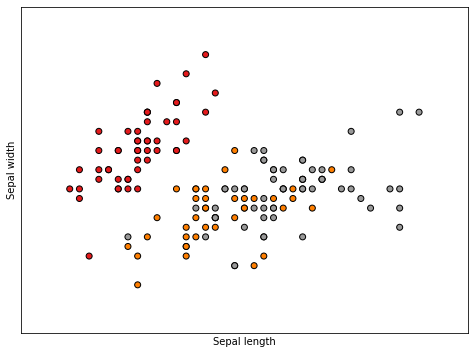

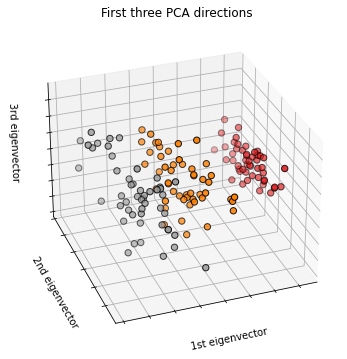

In [93]:
# https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()